<a href="https://colab.research.google.com/github/Saulrega/EDA/blob/main/07_An%C3%A1lisis_multivariable_empleando_el_dataset_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis multivariable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv'

In [4]:
titanic_data_set=pd.read_csv(url,error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
titanic_data_set.shape

(891, 12)

In [24]:
total = titanic_data_set.isnull().sum().sort_values(ascending=False)

In [25]:
women = titanic_data_set.loc[titanic_data_set.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

In [26]:
men = titanic_data_set.loc[titanic_data_set.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

In [31]:
titanic_data_set['Survived'] = titanic_data_set['Survived'].map({0:"not_survived",
1:"survived"})

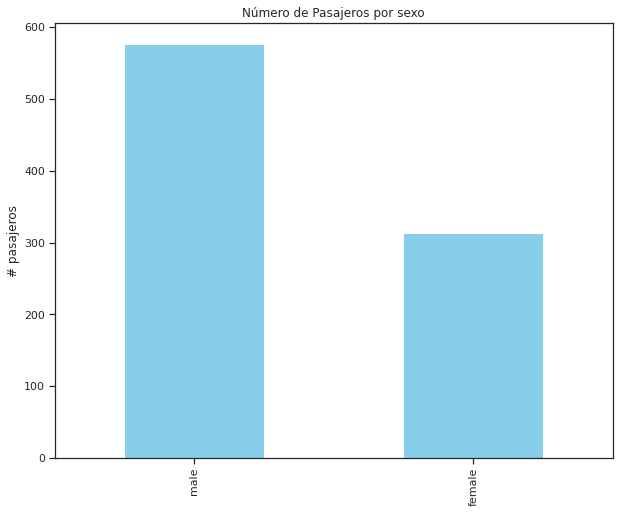

In [36]:
#Graficación 
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
titanic_data_set["Sex"].value_counts().plot.bar(color = "skyblue")
ax.set_title("Número de Pasajeros por sexo")
ax.set_ylabel("# pasajeros")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


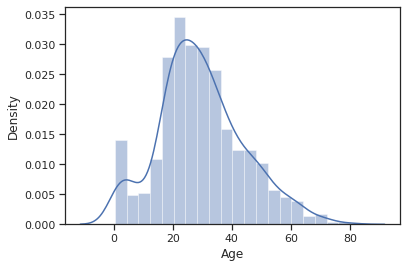

In [20]:
sns.distplot(titanic_data_set['Age'].dropna())

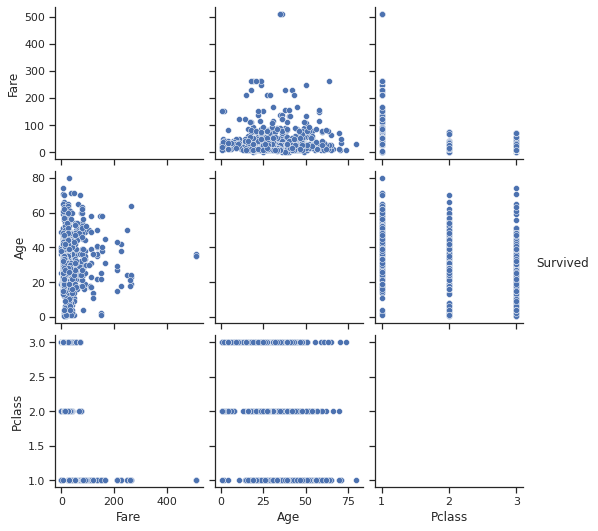

In [21]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic_data_set,vars = [ 'Fare','Age','Pclass'],
hue="Survived")
plt.show()

In [22]:
titanic_data_set['Embarked'] = titanic_data_set['Embarked'].map({"S":1,
"C":2,"Q":2,"NaN":0})
Tcorrelation = titanic_data_set.corr(method='pearson')
Tcorrelation

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN


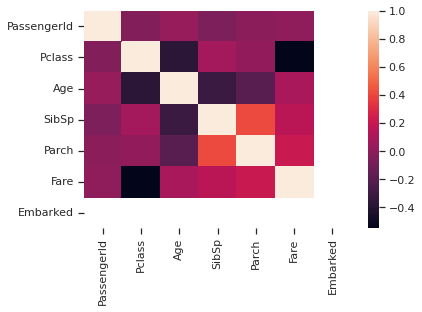

In [23]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
 yticklabels=Tcorrelation.columns)